# EDA

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

# local imports
from Utils import write_json

# plotting arguments
sns.set(rc={'figure.figsize':(15.7,5)})

# Helper Functions

In [2]:
def data_overview(df):
    df_ov = pd.DataFrame(index=df.columns)
    total = df.shape[0]
    df_ov['df_observations'] = df.shape[0]
    df_ov['dtype'] = df.dtypes
    df_ov['unique_count'] = df.nunique()
    df_ov['unique_perc(%)'] = round(df_ov['unique_count']/total * 100, 2)
    df_ov['dup_count'] = df_ov['df_observations'] - df_ov['unique_count']
    df_ov['zero_count'] = df[df == 0].count()
    df_ov['zero_perc(%)'] = round(df_ov['zero_count']/total * 100, 2)
    df_ov['null_count'] = df_ov['df_observations'] - df.count()
    df_ov['null_perc(%)'] = round(df_ov['null_count']/total * 100, 2)
    
    return df_ov

def plot_tags(df):
    sns.set(rc={'figure.figsize':(15.7,5)})
    for col in df.columns:
        plt.plot(df[col], label = f'{col}');
        plt.title(f'{col} initial');
        plt.legend();
        plt.show();

    return

# Load & Setup Data

In [3]:
# process
process = 'b21'

# load in data, configs
HIST_DF_PATH = f'../outputs/{process}_hist_df.csv'
df = pd.read_csv(HIST_DF_PATH).set_index('Date')
df.index = pd.to_datetime(df.index)

# delete suffix from column name
df.columns = [tag.replace(' Stanlow', '') for tag in df.columns]

# load in tags list
sheet = "B21"
tags_list_df = pd.read_excel('../data/Boiler Resource Efficiency Tag List v0.xlsx', sheet_name = sheet)

# Config Generate & Sort Tags

In [4]:
# map each tag to controllable, noncontrollable, response
used_tags = df.columns.tolist()

# controllable
ctrl_df = tags_list_df.loc[tags_list_df['Type '] == 'Control', :]
ctrl_tags = ctrl_df['Name'].tolist()

# response
response_df = tags_list_df.loc[tags_list_df['Type '] == 'Response', :]
response_tags = response_df['Name'].tolist()

# kpi tags
kpi_df = tags_list_df.loc[tags_list_df['Type '] == 'KPI', :]
kpi_tags = kpi_df['Name'].tolist()
kpi_names = kpi_df['Description'].tolist()

# noncontrollable
indct_tags = [tag for tag in used_tags if tag not in ctrl_tags and tag not in response_tags and tag not in kpi_tags]

# make config to track this
tag_types_dict = dict()
tag_types_dict['control'] = ctrl_tags
tag_types_dict['noncontrol'] = indct_tags
tag_types_dict['response'] = response_tags

# map each tag to more meaningful name

# get descriptions of used tags
names_dict = tags_list_df.loc[tags_list_df['Name'].isin(used_tags), :].set_index('Name')['Description'].to_dict()

In [5]:
tags_dict = {}
tags_dict['controllable'] = ctrl_tags
tags_dict['noncontrollable'] = indct_tags
tags_dict['response'] = response_tags
tags_dict['kpi'] = kpi_tags

write_json(tags_dict, f'../outputs/{process}_tags_dict.json')

# Split Data

In [6]:
# split into seperate dfs
ctrl_df = df[ctrl_tags]
response_df = df[response_tags]
indct_df = df[indct_tags]


# # map column names of df to meaningful name
ctrl_df.columns = [v for k,v in names_dict.items() if k in ctrl_tags]
response_df.columns = [v for k,v in names_dict.items() if k in response_tags]
indct_df.columns = [v for k,v in names_dict.items() if k in indct_tags]

# Examine Initial Data

## Control Tags

In [7]:
data_overview(ctrl_df)

,df_observations,dtype,unique_count,unique_perc(%),dup_count,zero_count,zero_perc(%),null_count,null_perc(%)
COMBUSTION AIR CONTROL,82900,float64,81345,98.12,1555,0,0.00,1382,1.67
FUEL OIL CONTROL,82900,float64,40239,48.54,42661,991,1.20,31961,38.55
B21 Gas Load,82900,float64,71091,85.76,11809,819,0.99,10981,13.25


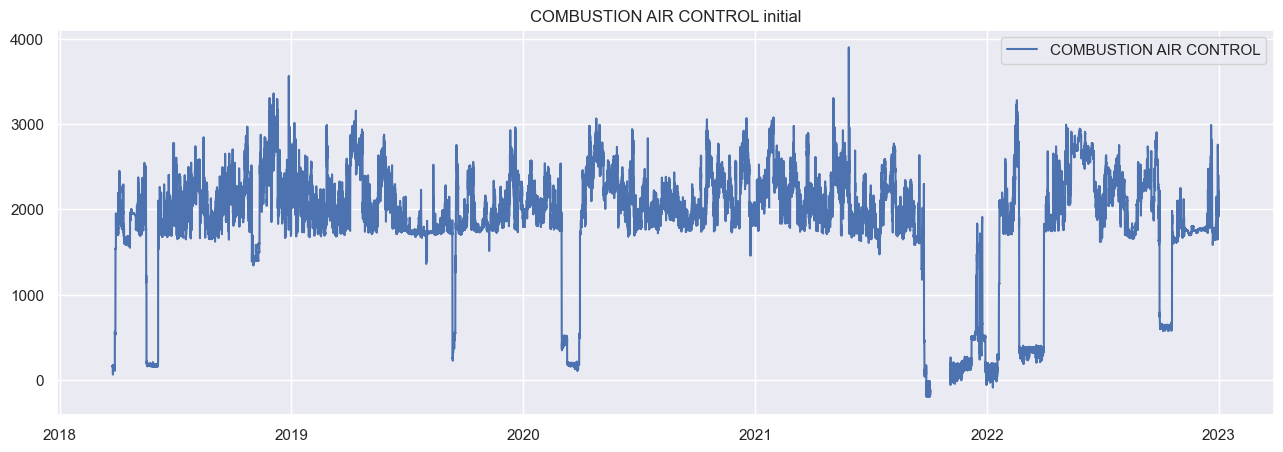

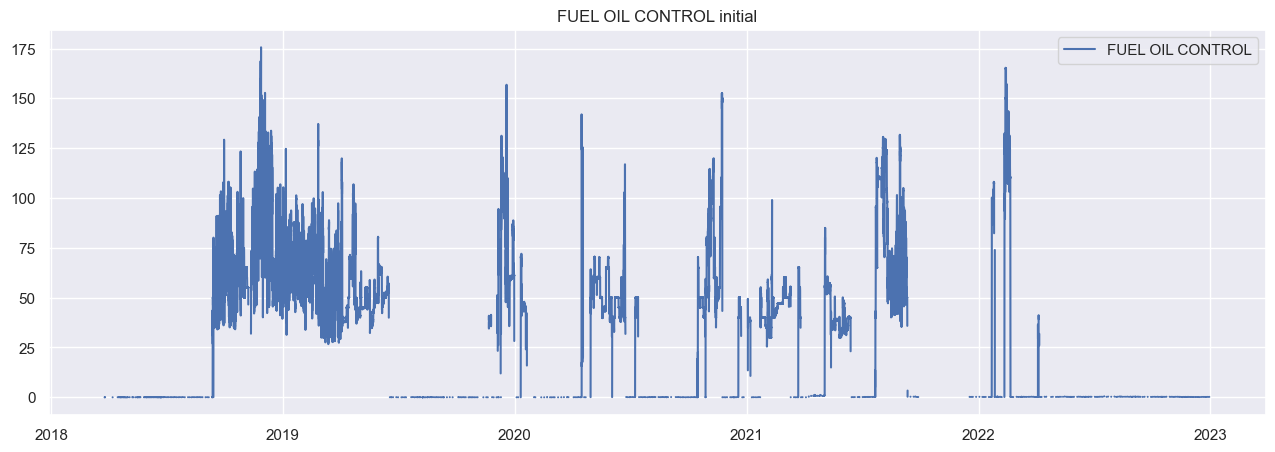

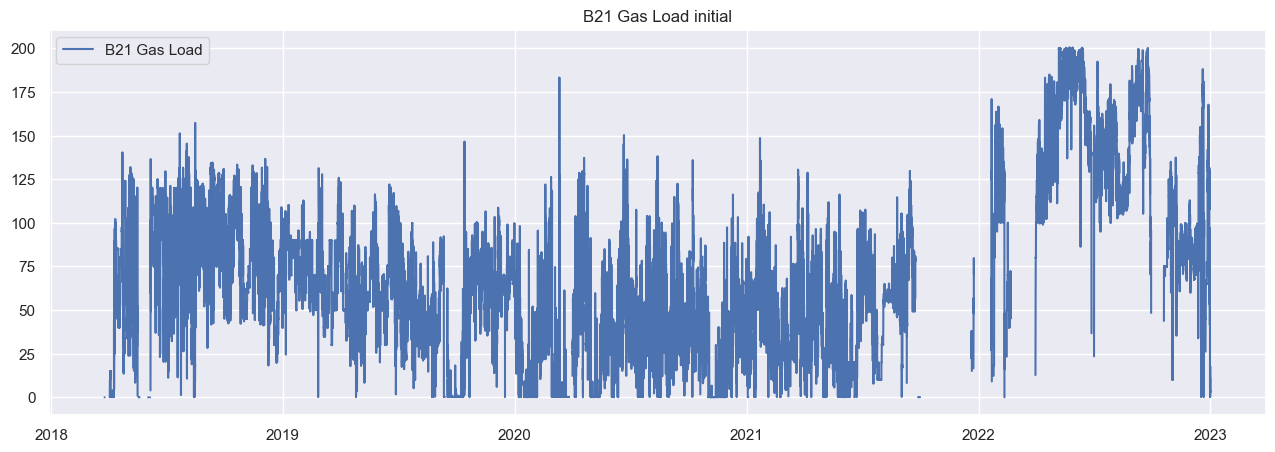

In [8]:
plot_tags(ctrl_df)

## Noncontrollable Tags

In [9]:
data_overview(indct_df)

,df_observations,dtype,unique_count,unique_perc(%),dup_count,zero_count,zero_perc(%),null_count,null_perc(%)
FEEDWATER FLOW CONTROL,82900,float64,79260,95.61,3640,0,0.00,3258,3.93
FLUE GAS OUTLET TEMP,82900,float64,23058,27.81,59842,0,0.00,28195,34.01
LCAP AIR IN B SIDE TEMP,82900,float64,4546,5.48,78354,0,0.00,71518,86.27
LCAP AIR OUT A SIDE TEMP,82900,float64,13609,16.42,69291,0,0.00,40263,48.57
LCAP AIR OUT B SIDE TEMP,82900,float64,11198,13.51,71702,0,0.00,43813,52.85
B21 NAT GAS COMP TEMP,82900,float64,46031,55.53,36869,106,0.13,5705,6.88
FUEL GAS,82900,float64,5149,6.21,77751,0,0.00,72688,87.68
FUEL TEMP,82900,float64,4680,5.65,78220,0,0.00,72509,87.47


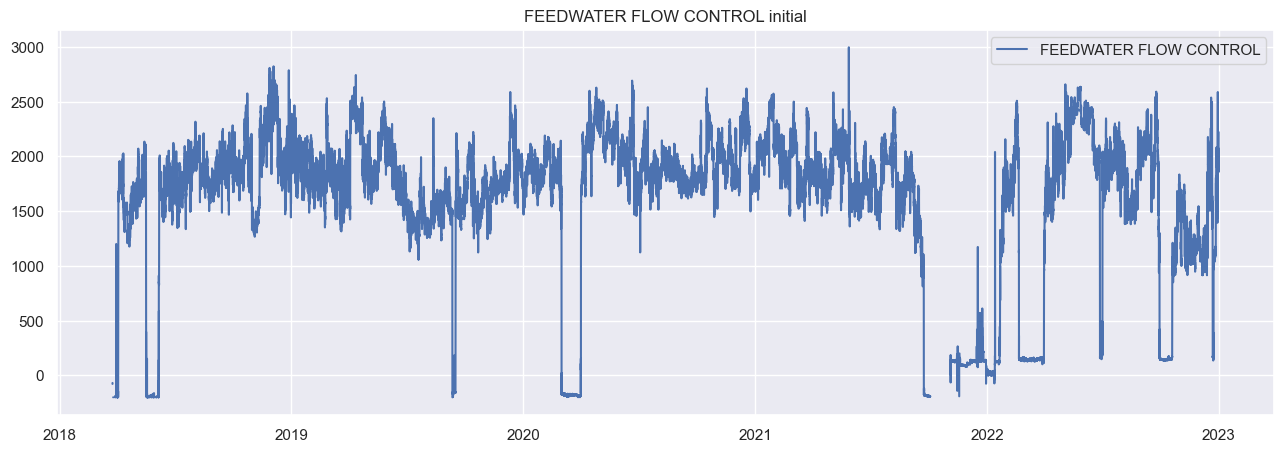

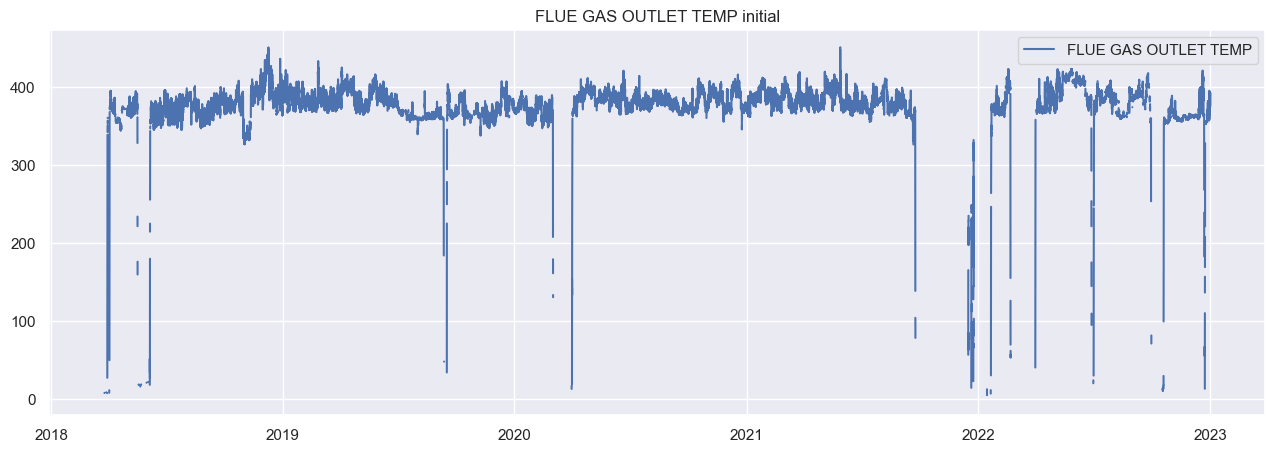

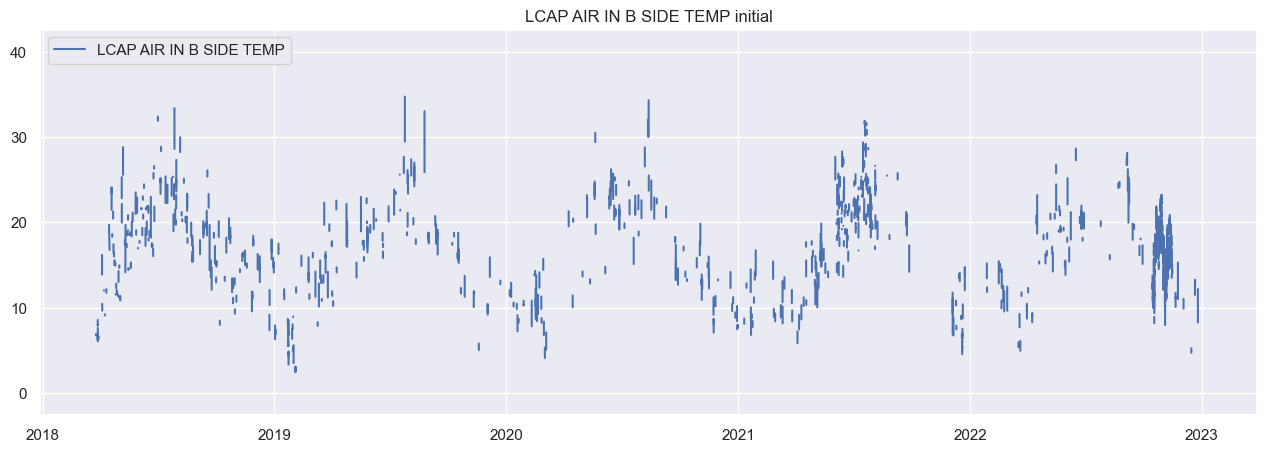

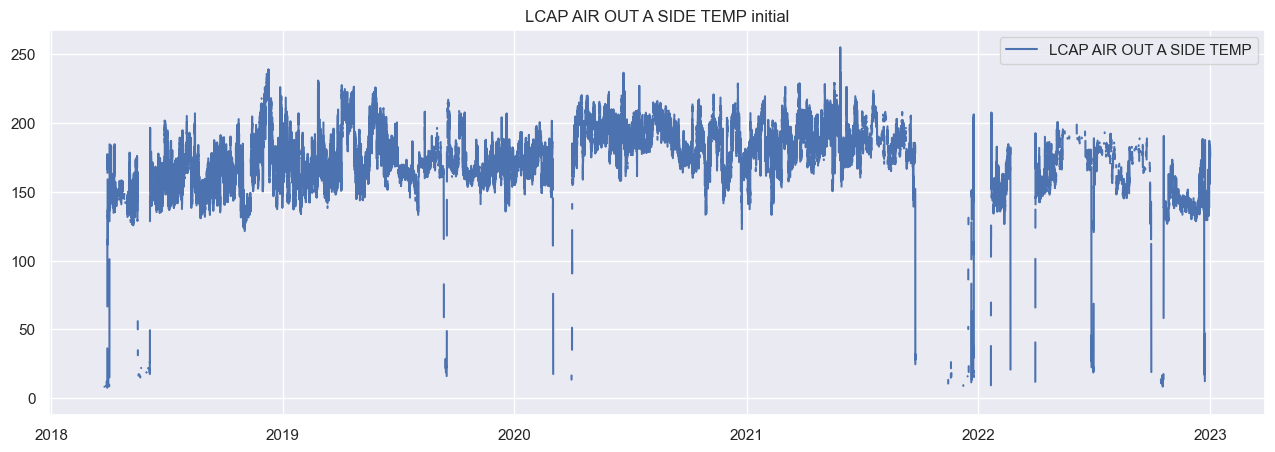

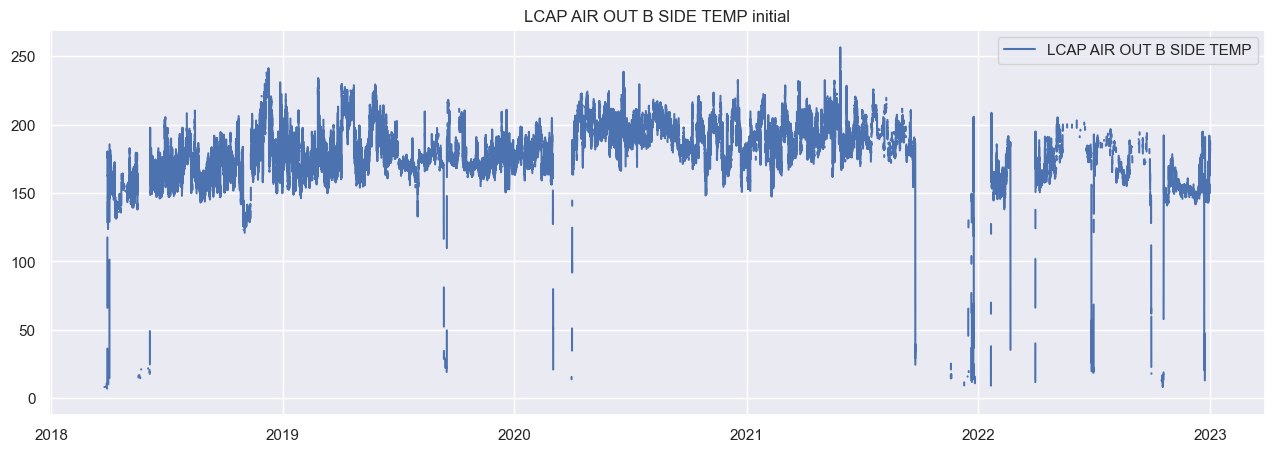

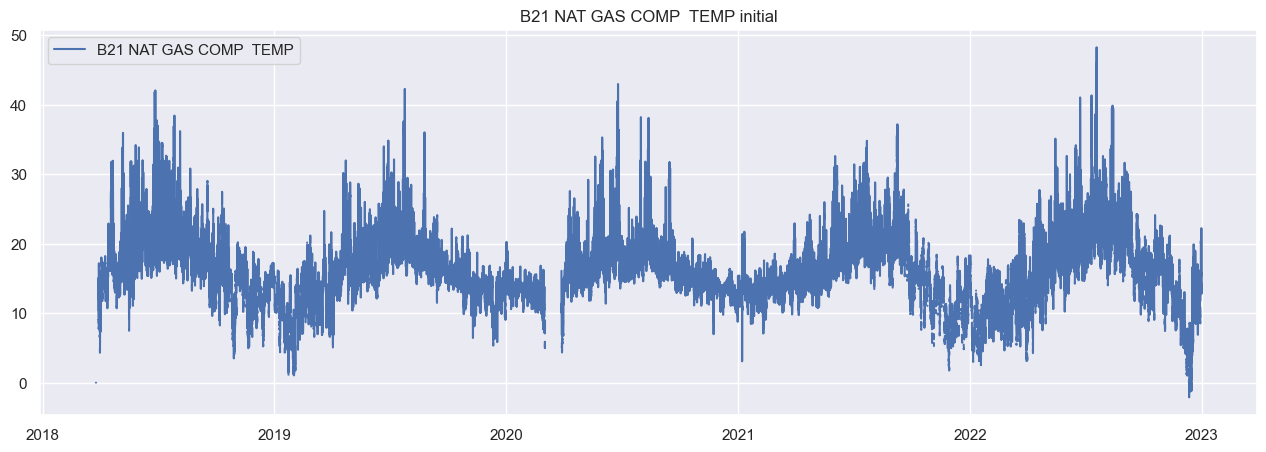

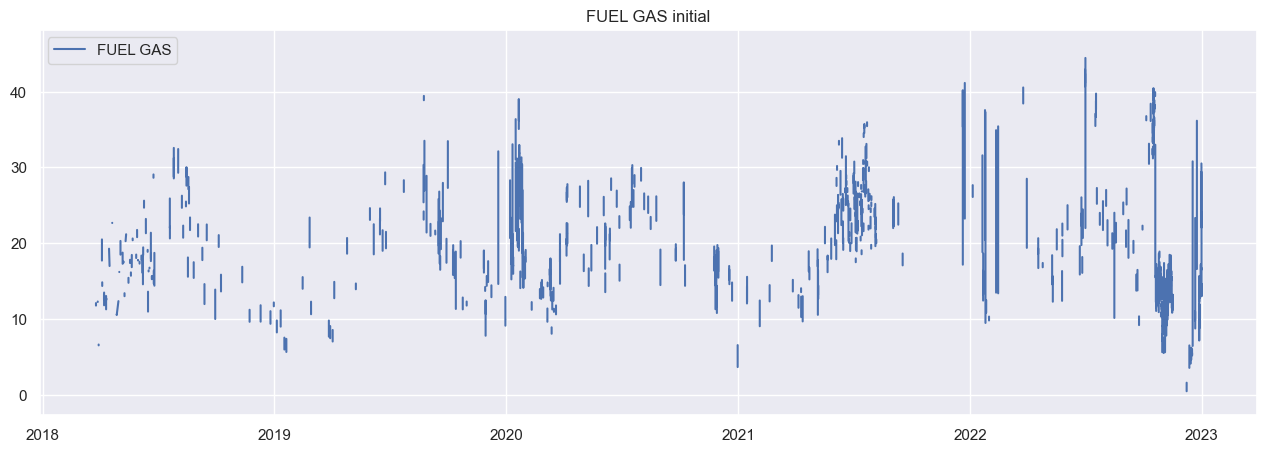

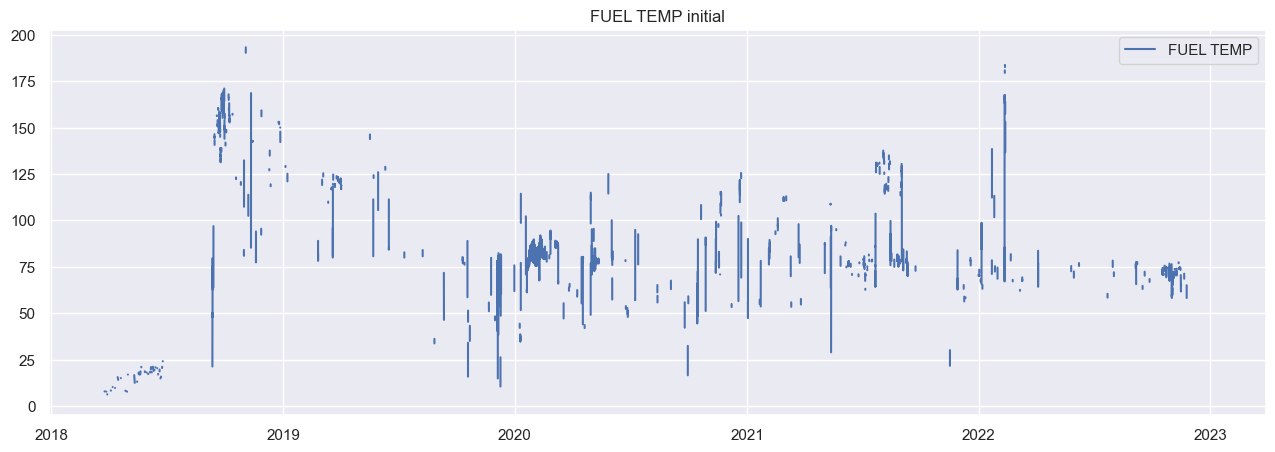

In [10]:
plot_tags(indct_df)

## Response Tags

In [11]:
data_overview(response_df)

,df_observations,dtype,unique_count,unique_perc(%),dup_count,zero_count,zero_perc(%),null_count,null_perc(%)
MP STEAM TO BOILER 21 AUXS,82900,float64,74880,90.33,8020,11,0.01,6963,8.40
VHP STEAM EX BOILER,82900,float64,71548,86.31,11352,864,1.04,10479,12.64
FINAL STEAM TEMP CONTROL,82900,float64,74251,89.57,8649,0,0.00,6604,7.97


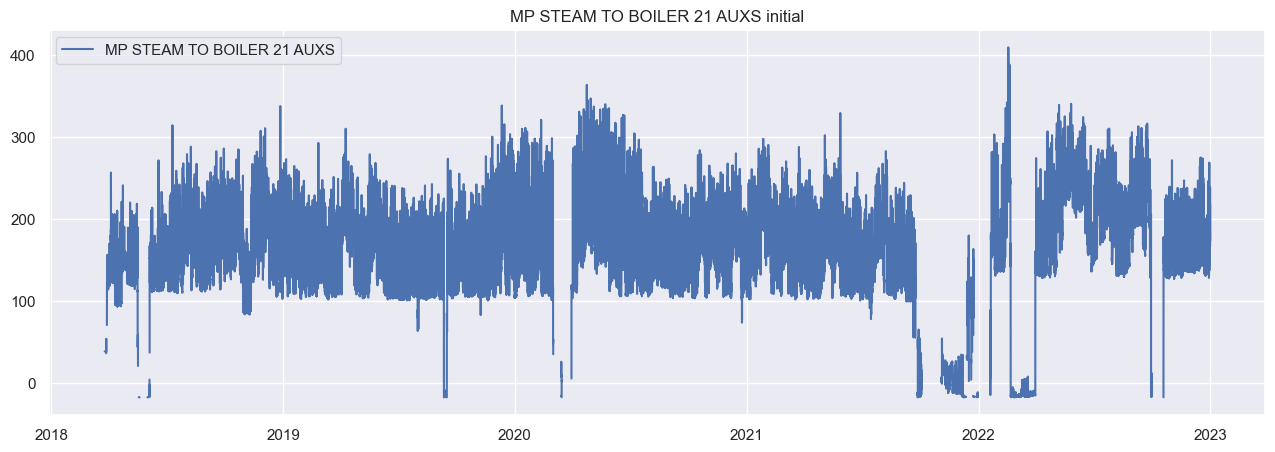

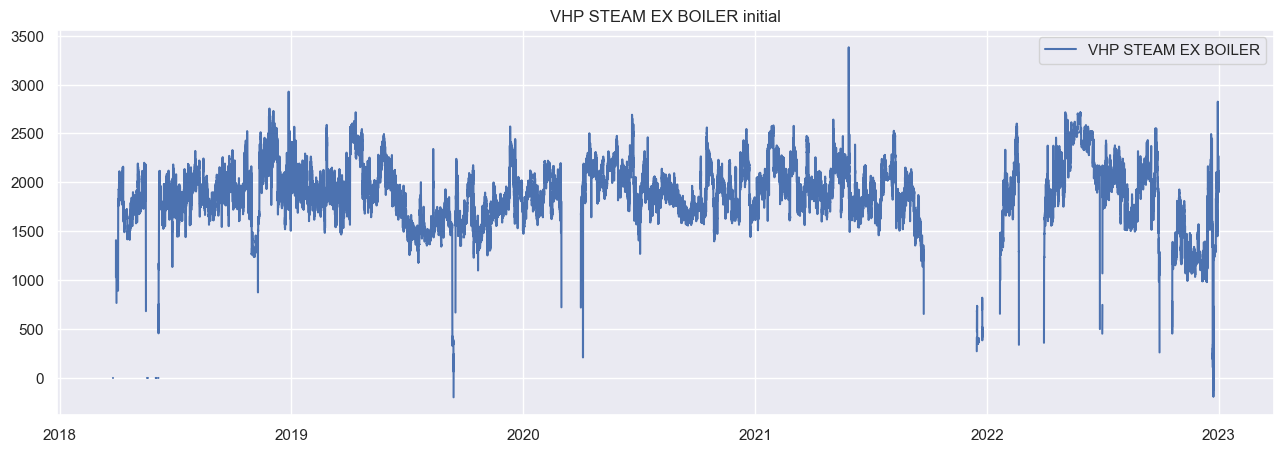

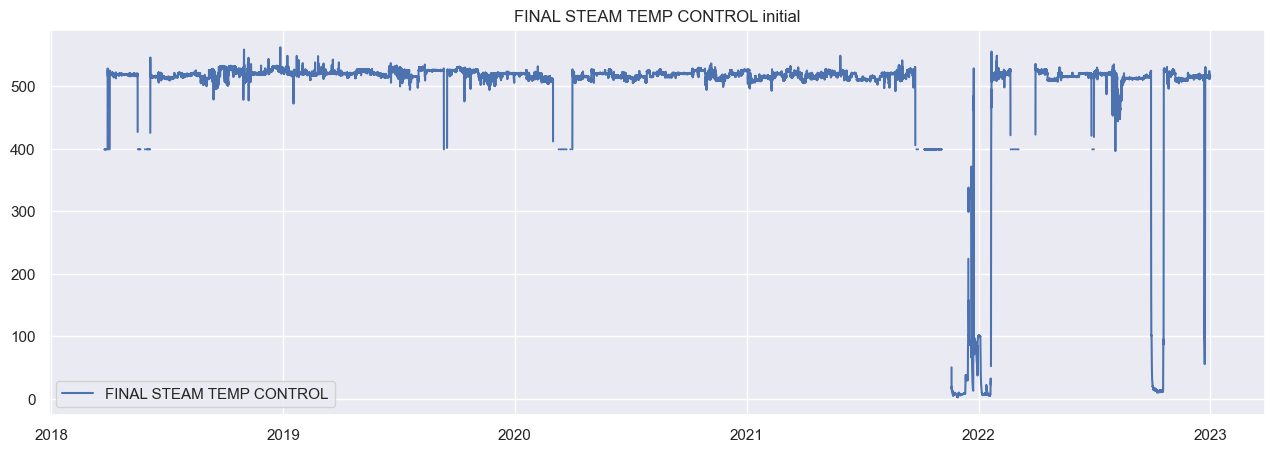

In [12]:
plot_tags(response_df)

# Fix Test Period

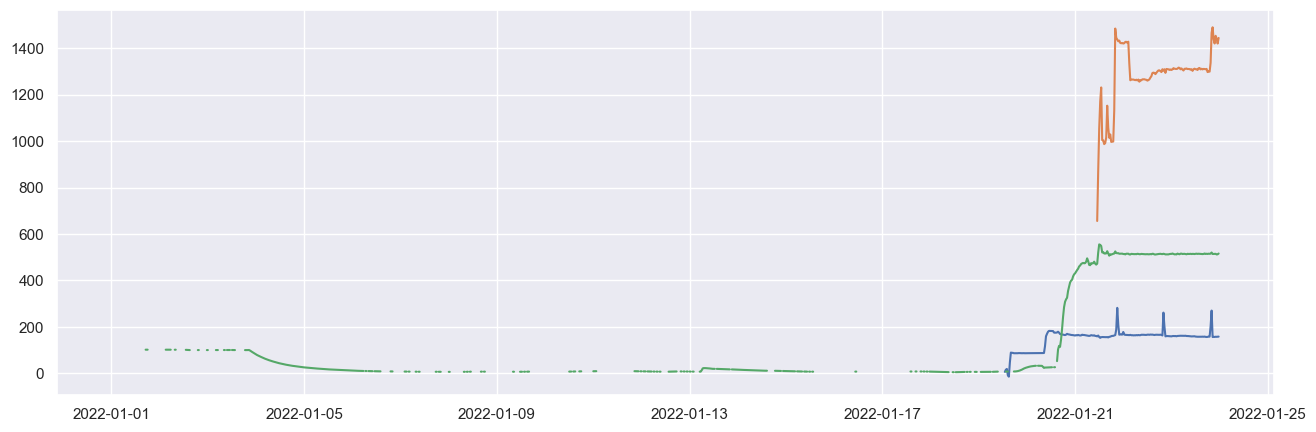

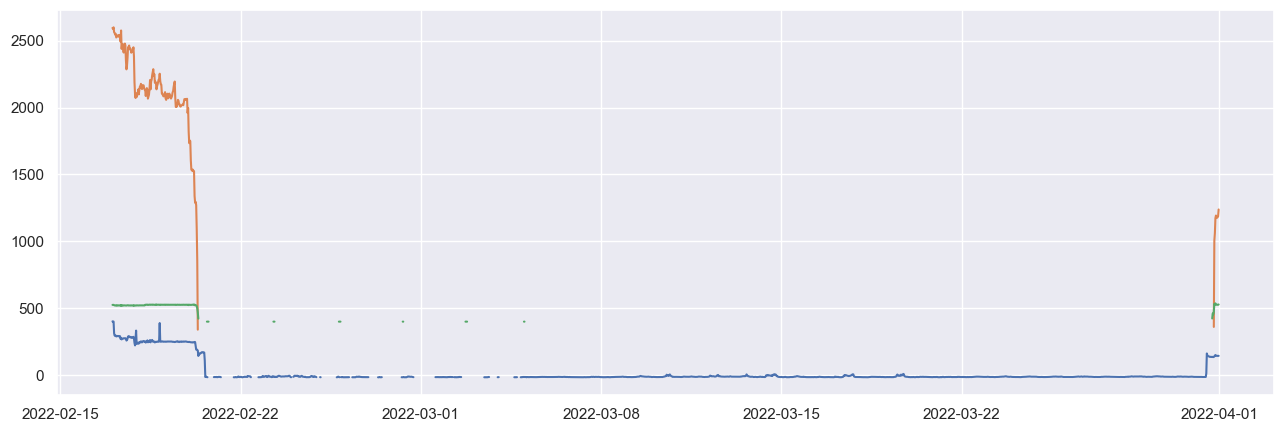

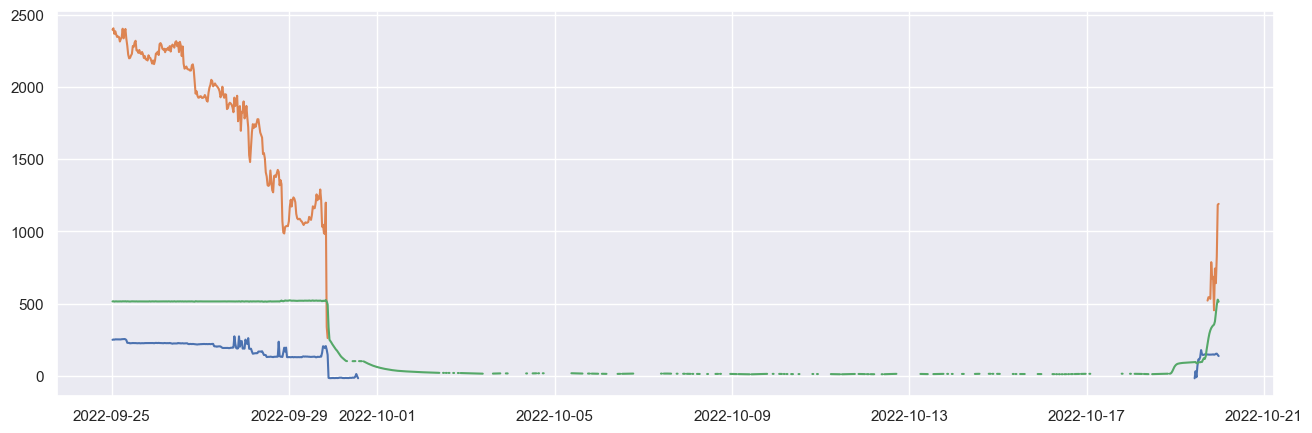

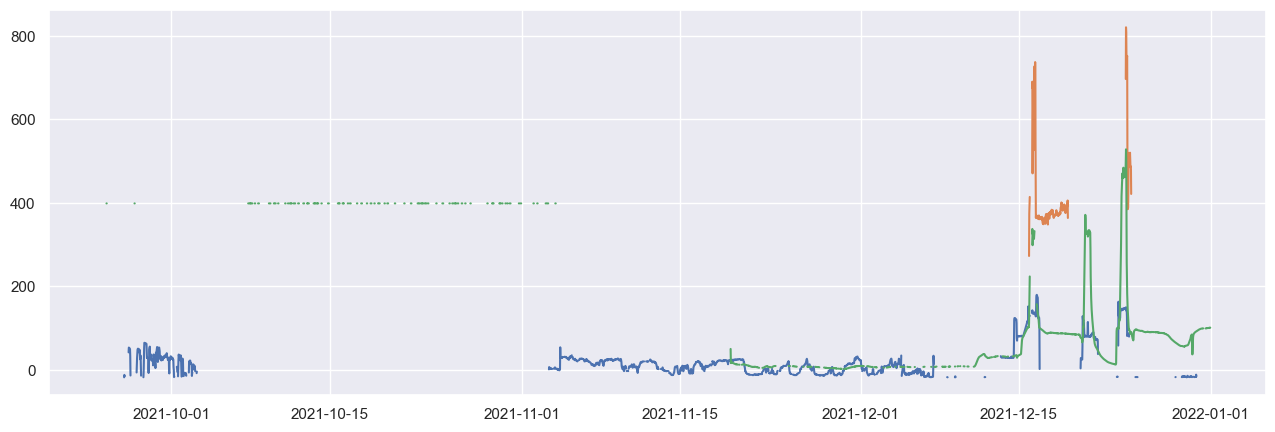

In [13]:
ctrl_cols = ctrl_df.columns
indct_cols = indct_df.columns
resp_cols = response_df.columns

all_df = pd.concat([ctrl_df, indct_df, response_df], axis = 1)

def show_bad_time_period(start_date, end_date):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    good_time_df = all_df[(all_df.index < start_date) | (all_df.index > end_date)]
    bad_time_df = response_df[(response_df.index > start_date) & (response_df.index < end_date)]
    
    plt.plot(bad_time_df);
    plt.show();
    
    return good_time_df

all_df = show_bad_time_period("2022-01-01 00:00:00", "2022-01-24 00:00:00")
all_df = show_bad_time_period("2022-02-17 00:00:00", "2022-04-01 00:00:00")
all_df = show_bad_time_period("2022-09-25 00:00:00", "2022-10-20 00:00:00")
all_df = show_bad_time_period("2021-09-25 00:00:00", "2022-01-01 00:00:00")

# **DATA PREPROCESSING**

### Drop Obs with at least half missing tags

In [14]:
print(f'Before dropping obs: {all_df.shape[0]}')
print(f'After dropping obs : {all_df.dropna(thresh = 8).shape[0]}')

all_df = all_df.dropna(thresh = 8)

ctrl_df = all_df.loc[:, ctrl_cols]
indct_df = all_df.loc[:, indct_cols]
response_df = all_df.loc[:, resp_cols]

Before dropping obs: 74031
After dropping obs : 66415


In [15]:
round(indct_df.isna().sum()/indct_df.shape[0],2)* 100

FEEDWATER FLOW CONTROL       0.0
FLUE GAS OUTLET TEMP        20.0
LCAP AIR IN B SIDE TEMP     85.0
LCAP AIR OUT A SIDE TEMP    38.0
LCAP AIR OUT B SIDE TEMP    43.0
B21 NAT GAS COMP  TEMP       2.0
FUEL GAS                    86.0
FUEL TEMP                   86.0
dtype: float64

### Drop Tags with high missing values

In [16]:
round(all_df.isna().sum()/all_df.shape[0] * 100, 2)

indct_df = indct_df.drop(['LCAP AIR IN B SIDE TEMP', 'FUEL TEMP', 'FUEL GAS'], axis = 1)

### Imputation

Missing values with be linearly interpolated with a max interpolation of 6 time slots

In [17]:
def lin_interp(df, thresh):
    
    df_int = df.interpolate(method = 'linear', limit = thresh)
    print("Missing values after interpolation")
    print(round(df_int.isna().sum()/df_int.shape[0],3)*100)
    print("")
    
    return df_int

ctrl_df = lin_interp(ctrl_df,6)
indct_df = lin_interp(indct_df,6)
response_df = lin_interp(response_df,6)

Missing values after interpolation
COMBUSTION AIR CONTROL    0.0
FUEL OIL CONTROL          1.6
B21 Gas Load              0.5
dtype: float64

Missing values after interpolation
FEEDWATER FLOW CONTROL      0.0
FLUE GAS OUTLET TEMP        1.8
LCAP AIR OUT A SIDE TEMP    2.7
LCAP AIR OUT B SIDE TEMP    3.3
B21 NAT GAS COMP  TEMP      0.0
dtype: float64

Missing values after interpolation
MP STEAM TO BOILER 21 AUXS    0.0
VHP STEAM EX BOILER           0.0
FINAL STEAM TEMP CONTROL      0.0
dtype: float64



### Drop in Values

There is an unexpected drop in values sometime in 2018 and early 2020. These will be omitted.

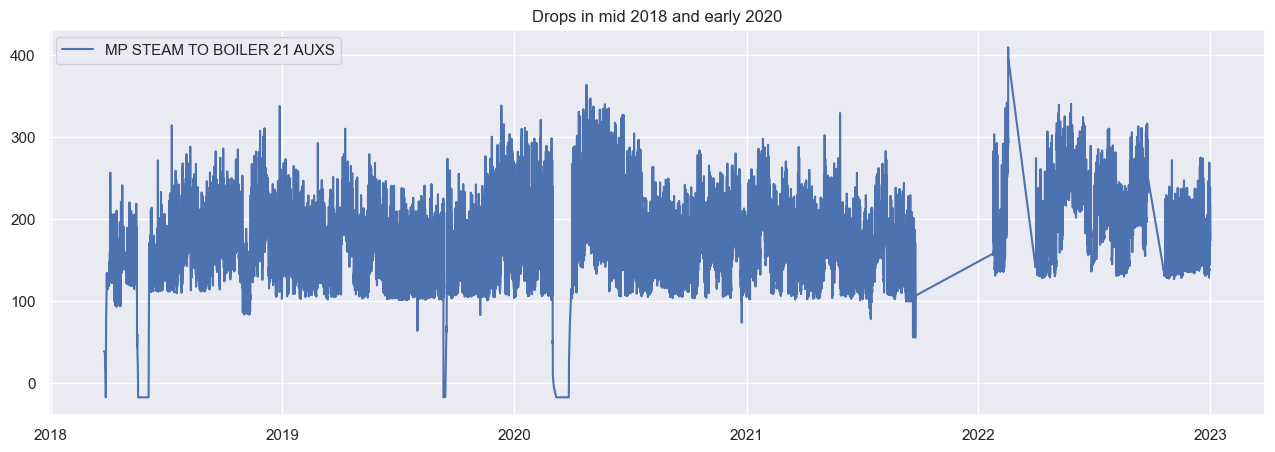

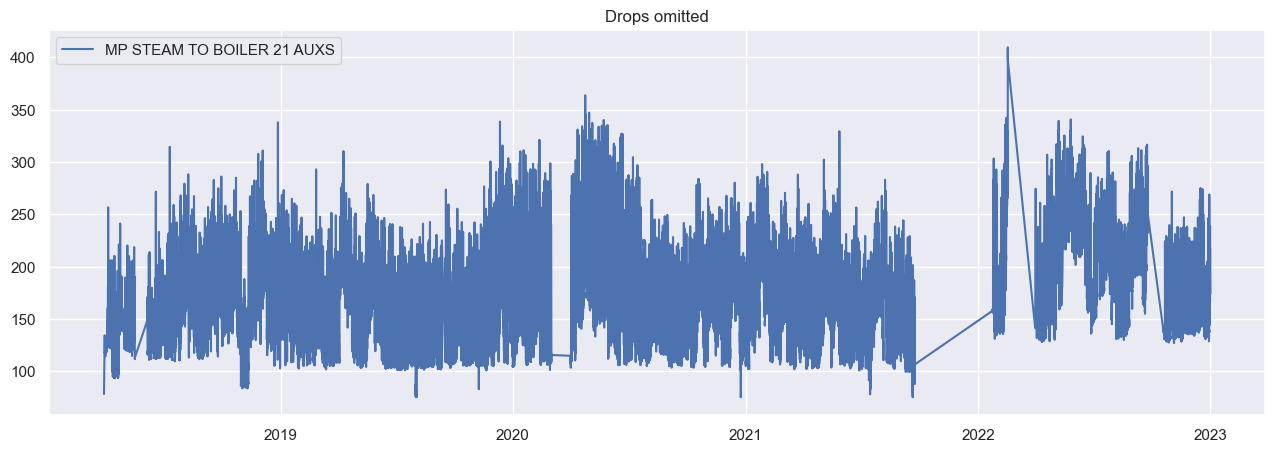

In [18]:
plt.plot(response_df['MP STEAM TO BOILER 21 AUXS'], label = 'MP STEAM TO BOILER 21 AUXS');
plt.legend();
plt.title("Drops in mid 2018 and early 2020");
plt.show();

def delete_low_vals(df):
    return df.loc[response_df['MP STEAM TO BOILER 21 AUXS'] >= 75, :]

ctrl_df = delete_low_vals(ctrl_df)
indct_df = delete_low_vals(indct_df)
response_df = delete_low_vals(response_df)

plt.plot(response_df['MP STEAM TO BOILER 21 AUXS'], label = 'MP STEAM TO BOILER 21 AUXS');
plt.legend();
plt.title("Drops omitted");
plt.show();

### Investigate High Missing Tags

In [19]:
ctrl_df = ctrl_df.interpolate()
indct_df = indct_df.interpolate()
response_df = response_df.interpolate()

### Combine and drop NA's

In [20]:
all_df = pd.concat([ctrl_df, indct_df, response_df], axis = 1)

print(f'Before dropping NAs {all_df.shape[0]}')
print(f'After dropping NAs {all_df.dropna().shape[0]}')

all_df = all_df.dropna()

Before dropping NAs 66253
After dropping NAs 66253


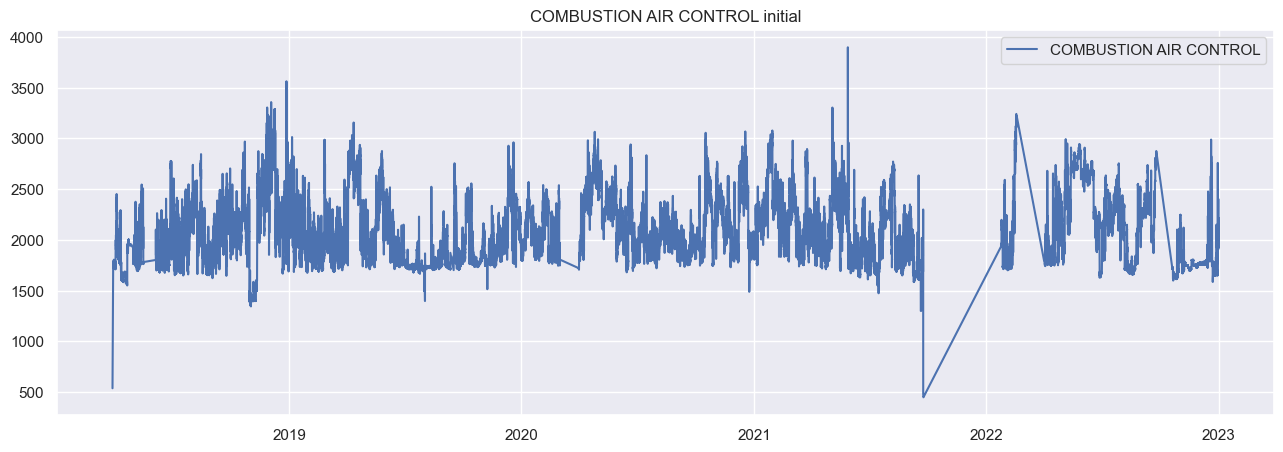

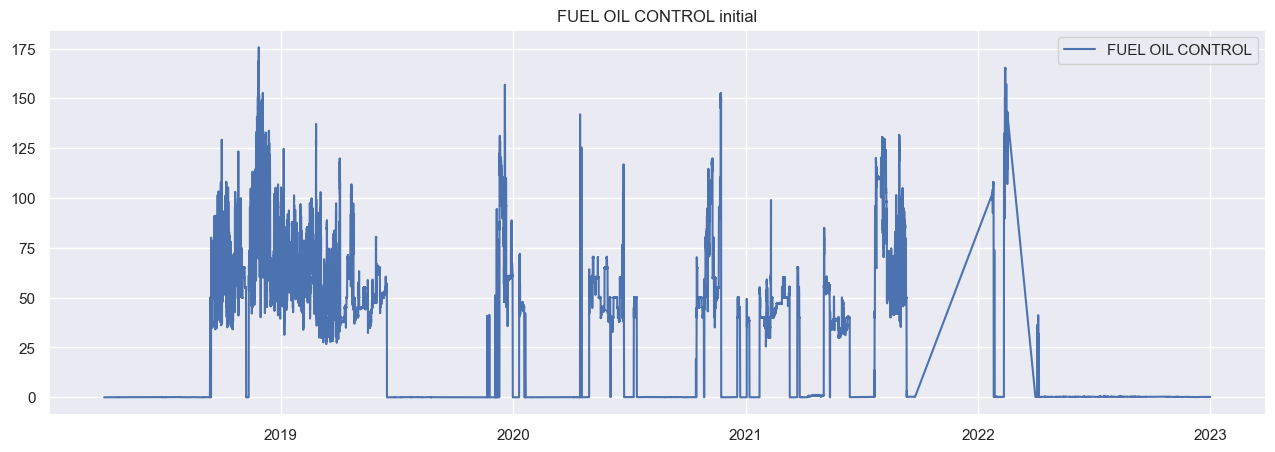

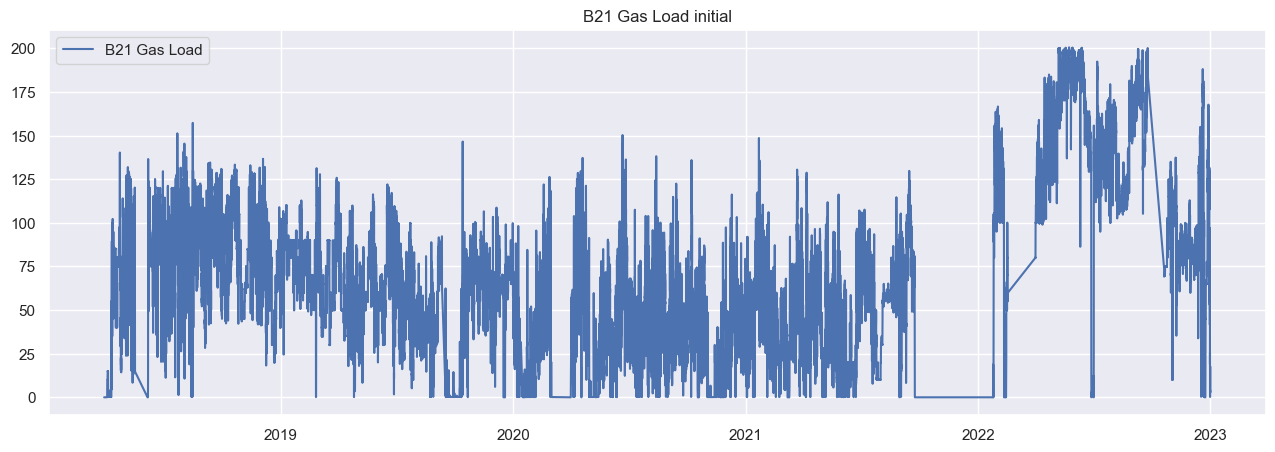

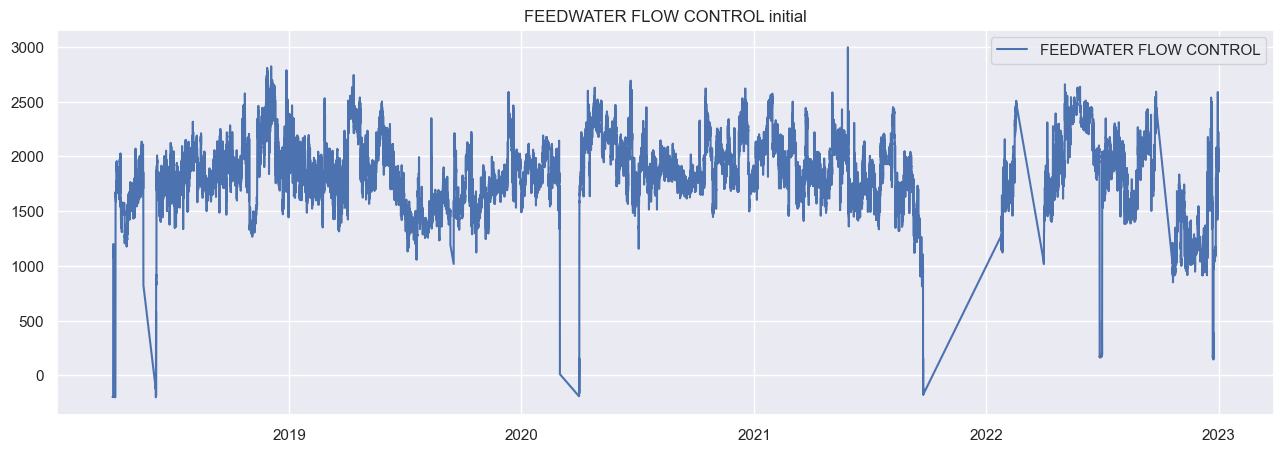

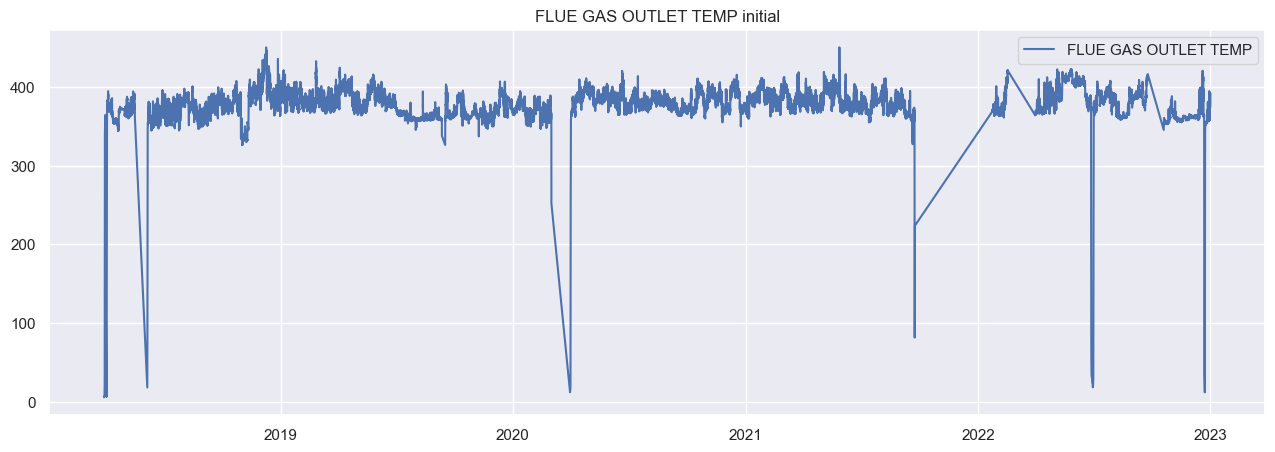

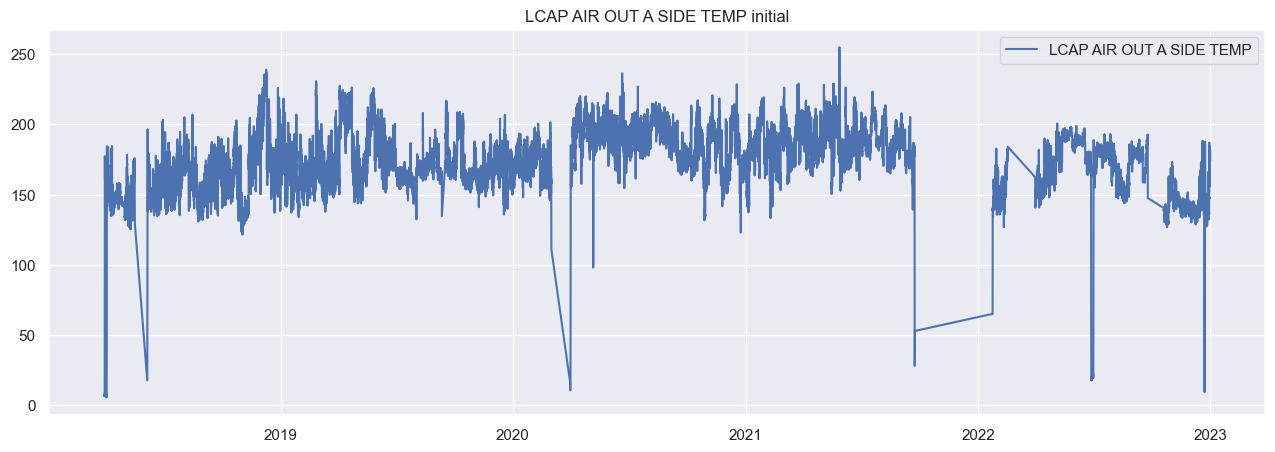

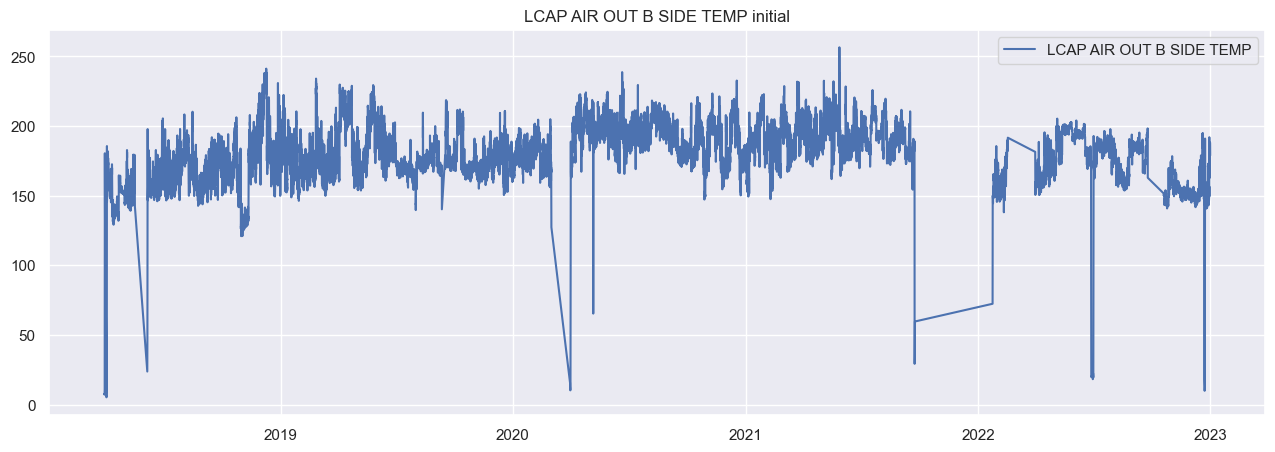

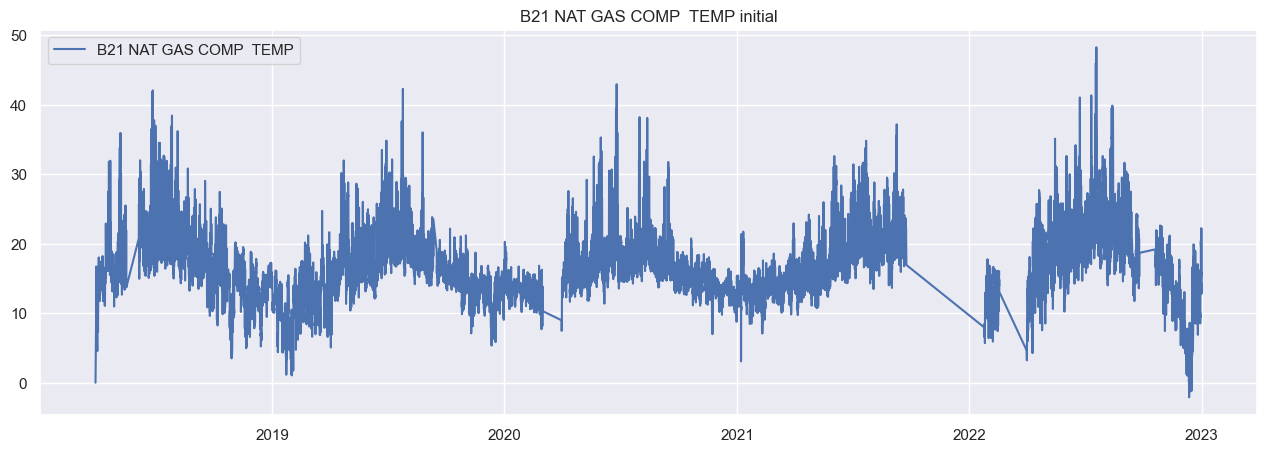

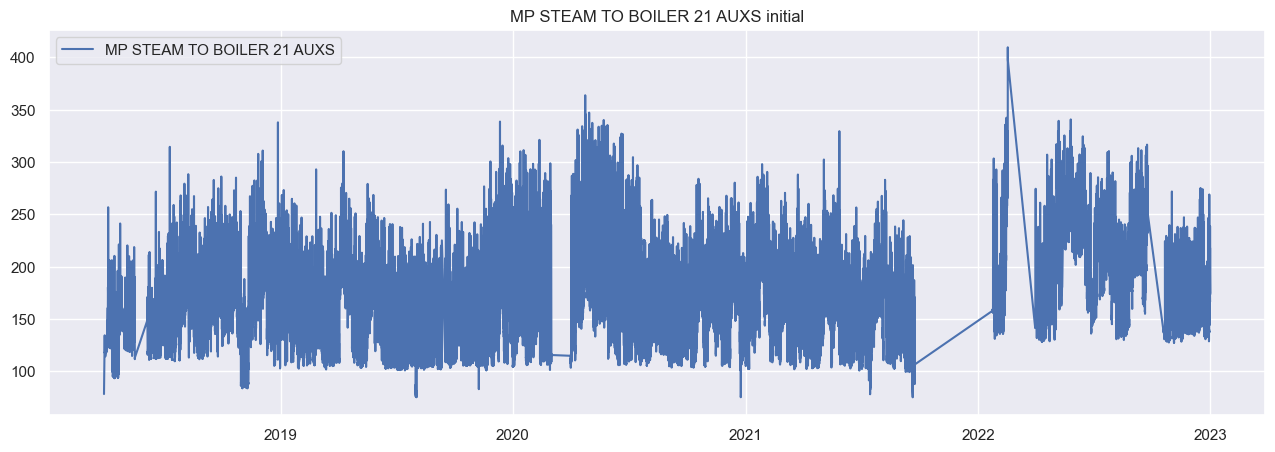

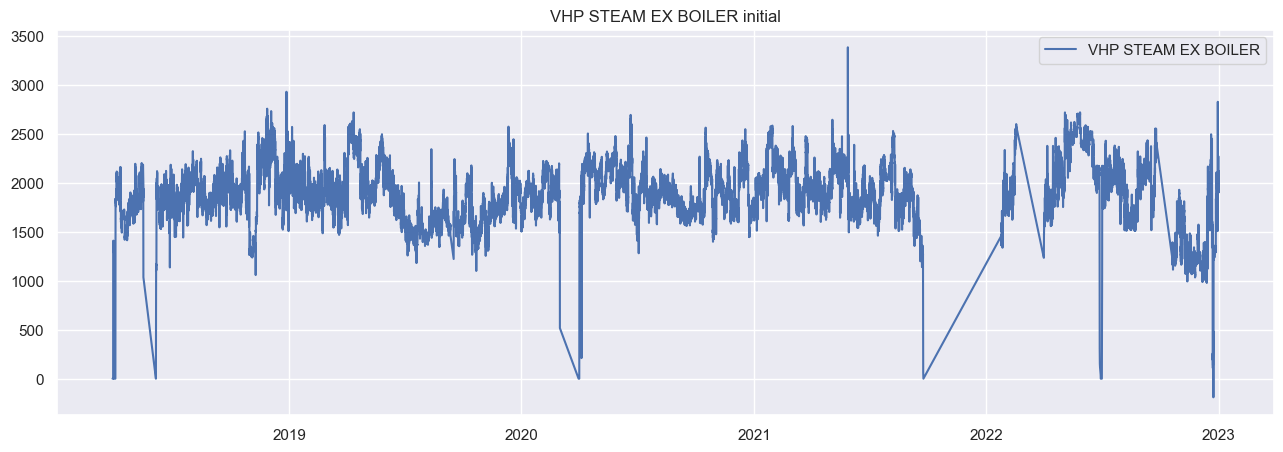

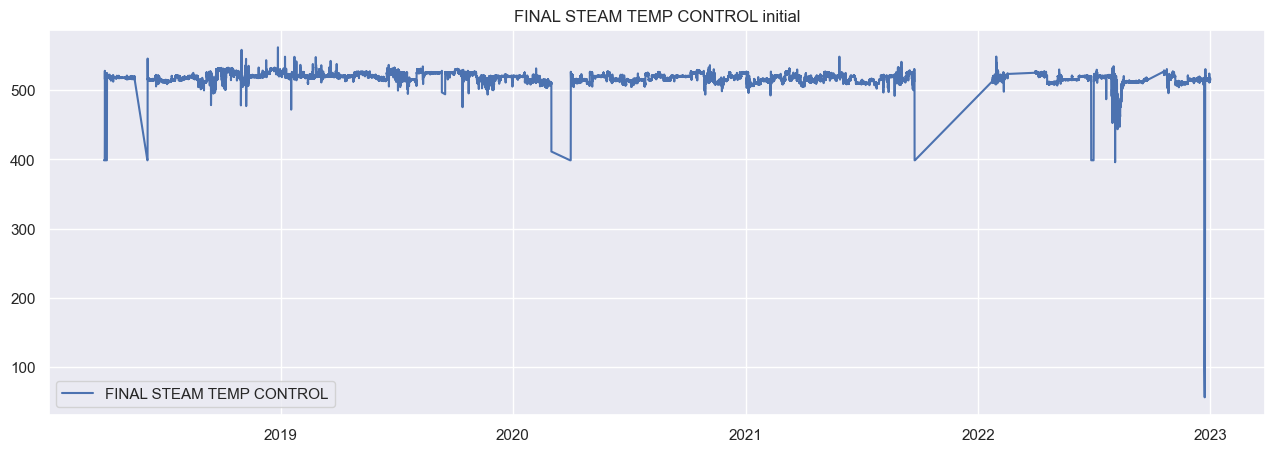

In [21]:
plot_tags(all_df)

### Correlation Analysis

### Control Tags

<Axes: >

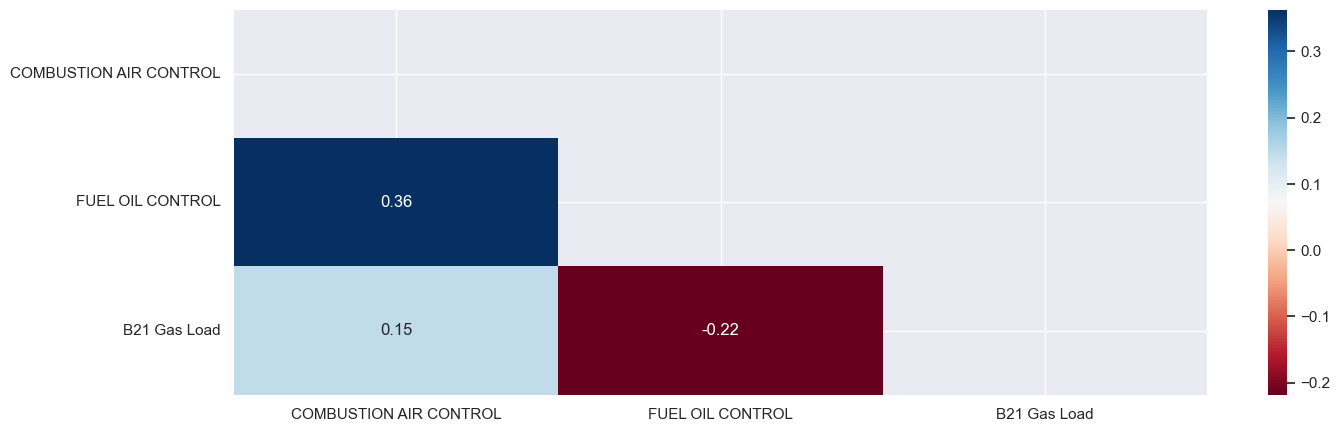

In [22]:
ctrl_corr_df = ctrl_df.corr()
ctrl_mask = np.triu(ctrl_corr_df)
sns.heatmap(ctrl_corr_df, mask = ctrl_mask, annot = True, cmap = 'RdBu')

### Response Tags

<Axes: >

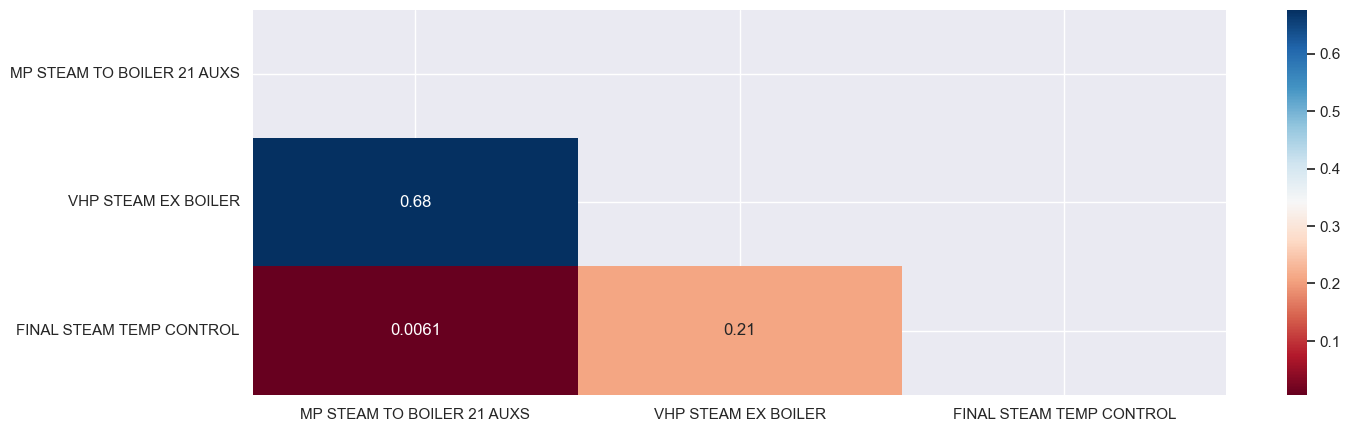

In [23]:
resp_corr_df = response_df.corr()
resp_mask = np.triu(resp_corr_df)
sns.heatmap(resp_corr_df, mask = resp_mask, annot = True, cmap = 'RdBu')

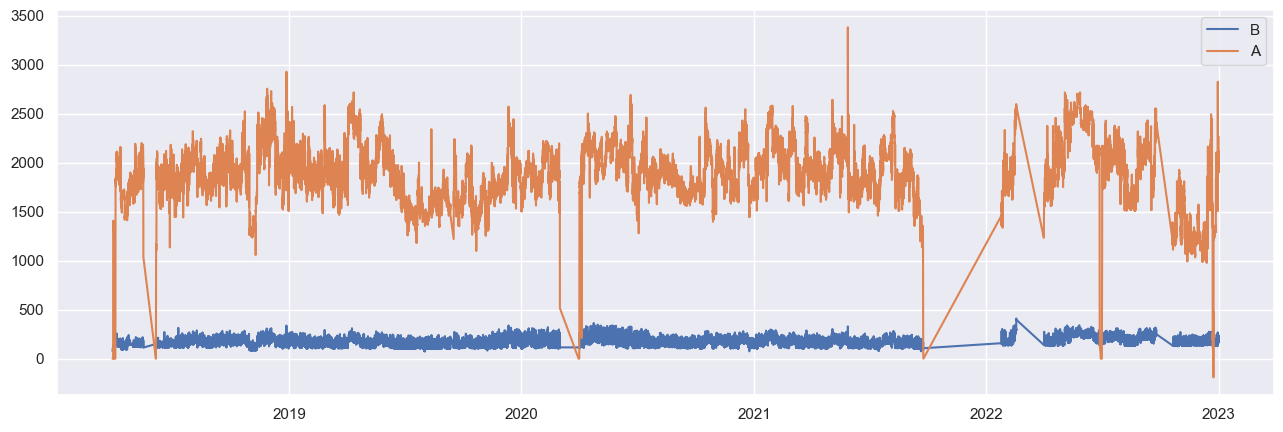

In [24]:
plt.plot(all_df['MP STEAM TO BOILER 21 AUXS'], label = 'B')
plt.plot(all_df['VHP STEAM EX BOILER'], label = 'A')
plt.legend()

all_df = all_df.assign(RESPONSE=lambda x: x['MP STEAM TO BOILER 21 AUXS'] + x['VHP STEAM EX BOILER'])
all_df = all_df.drop(['MP STEAM TO BOILER 21 AUXS', 'VHP STEAM EX BOILER'], axis = 1)

### Noncontrollable

<Axes: >

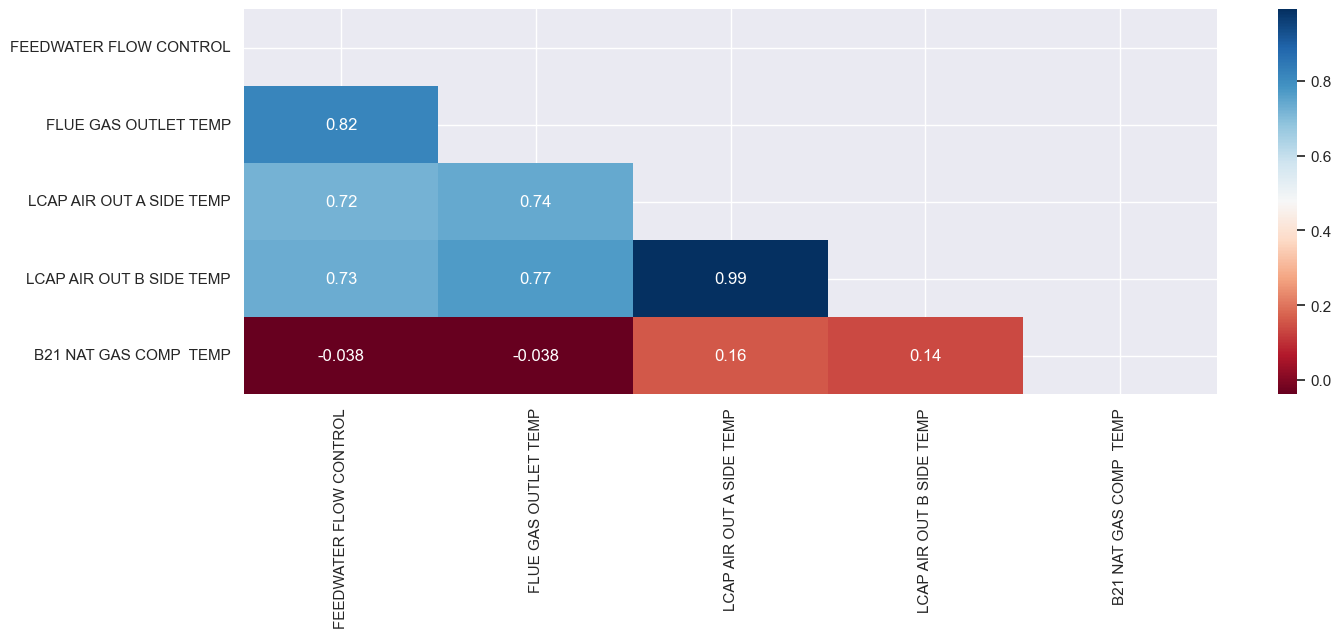

In [25]:
indct_corr_df = indct_df.corr()
indct_mask = np.triu(indct_corr_df)
sns.heatmap(indct_corr_df, mask = indct_mask, annot = True, cmap = 'RdBu')

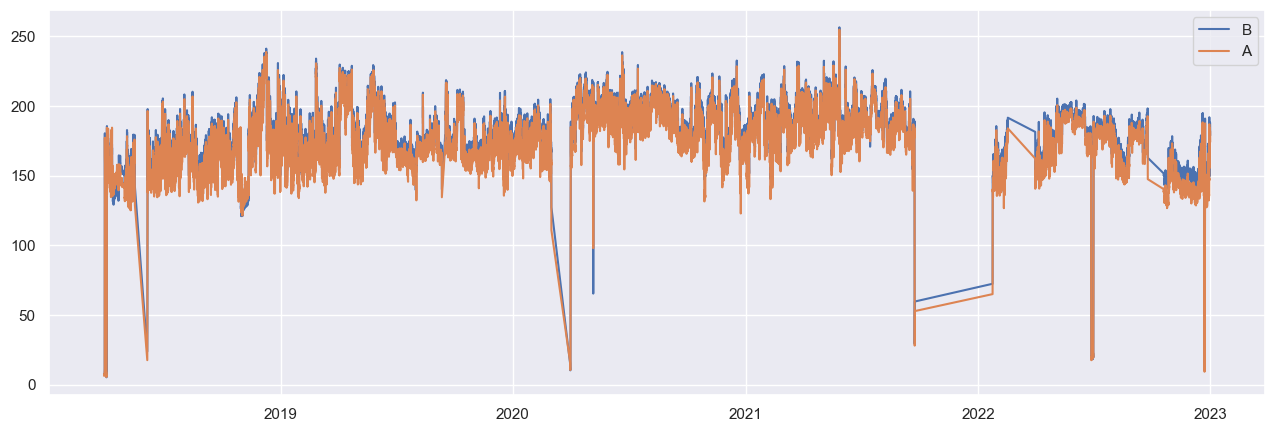

In [26]:
plt.plot(indct_df['LCAP AIR OUT B SIDE TEMP'], label = 'B')
plt.plot(indct_df['LCAP AIR OUT A SIDE TEMP'], label = 'A')
plt.legend()
plt.show()

all_df = all_df.drop(['LCAP AIR OUT B SIDE TEMP'], axis = 1)

### All of the Data

<Axes: >

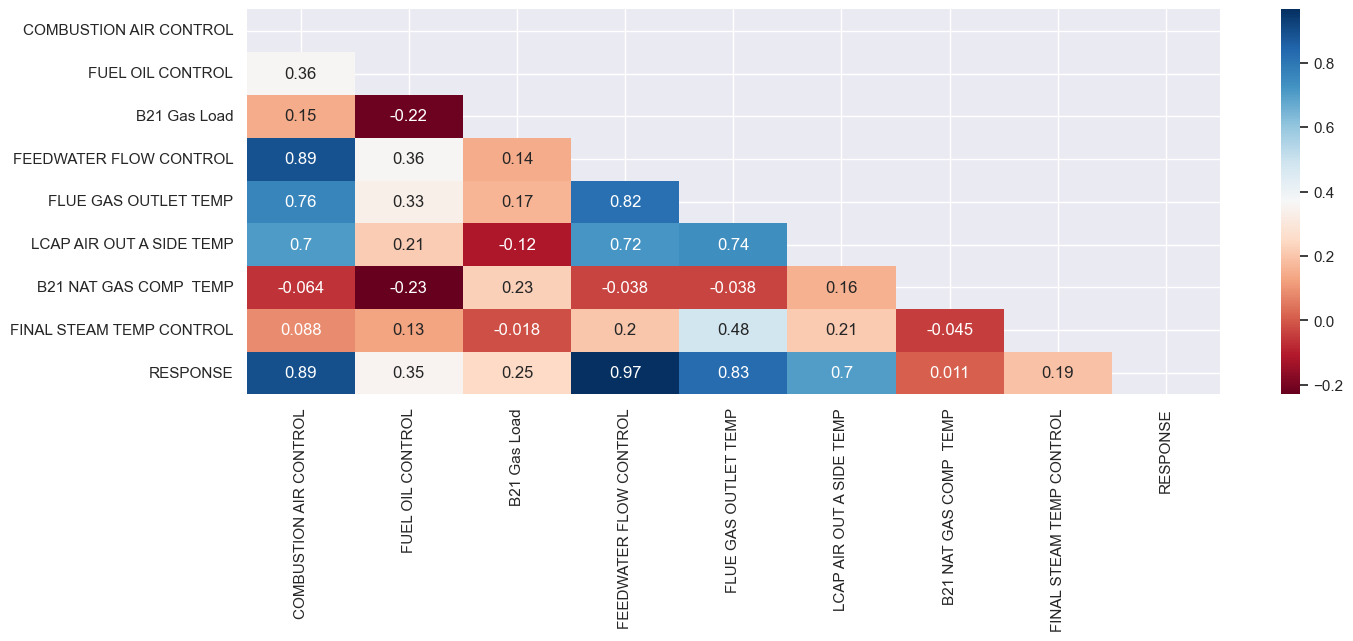

In [27]:
all_corr_df = all_df.corr()
all_mask = np.triu(all_corr_df)
sns.heatmap(all_corr_df, mask = all_mask, annot = True, cmap = 'RdBu')

# Sanity Check

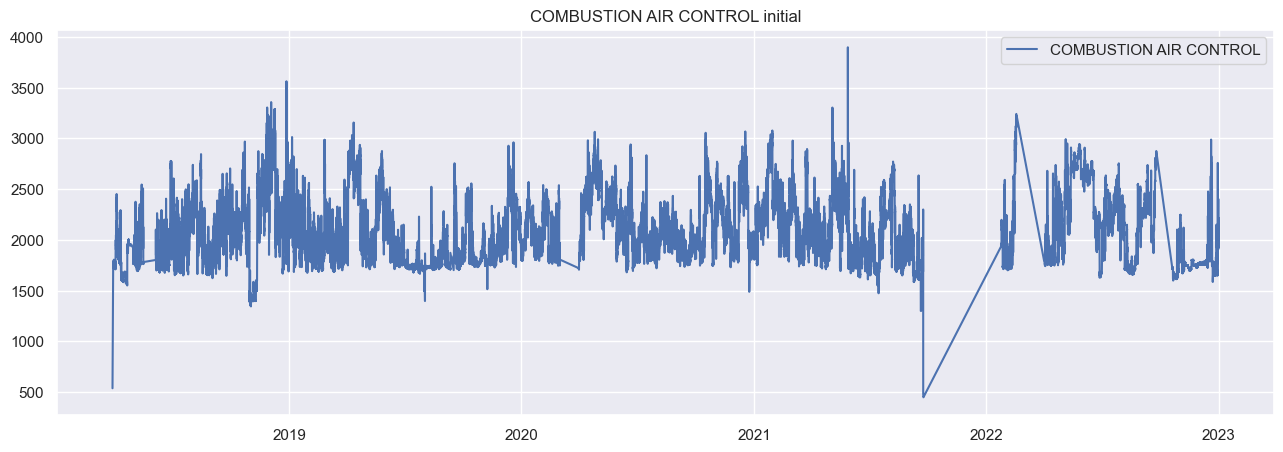

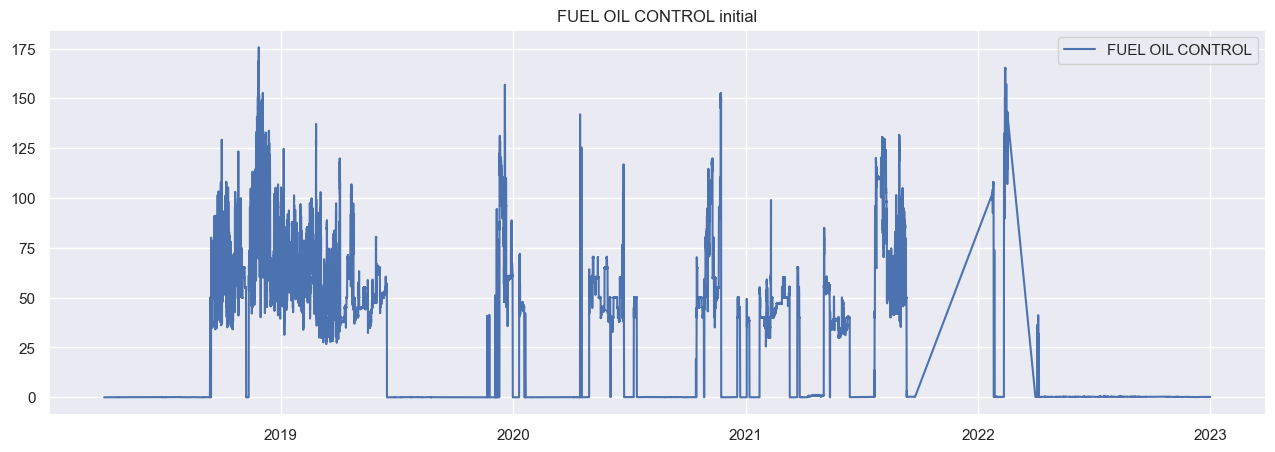

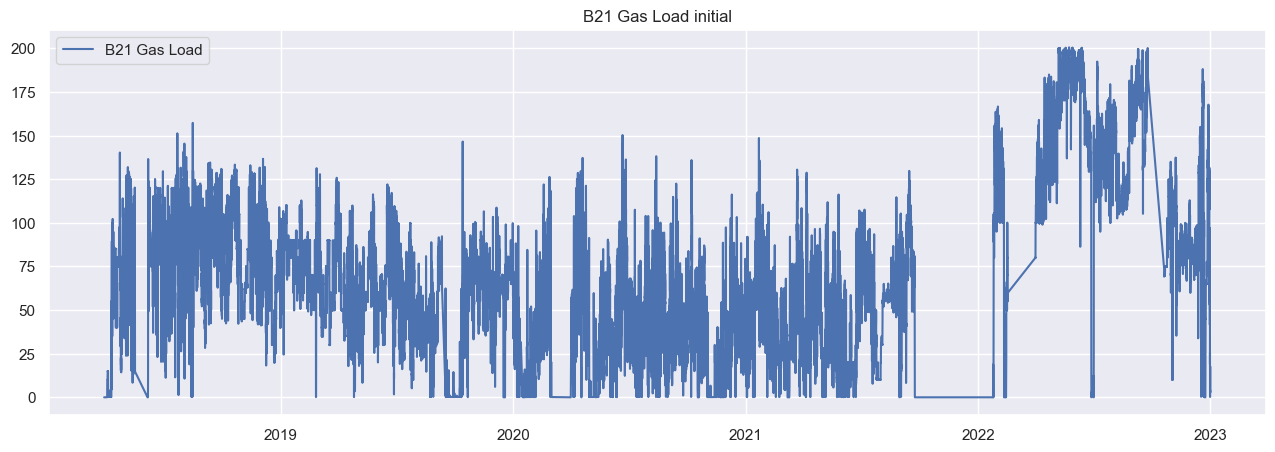

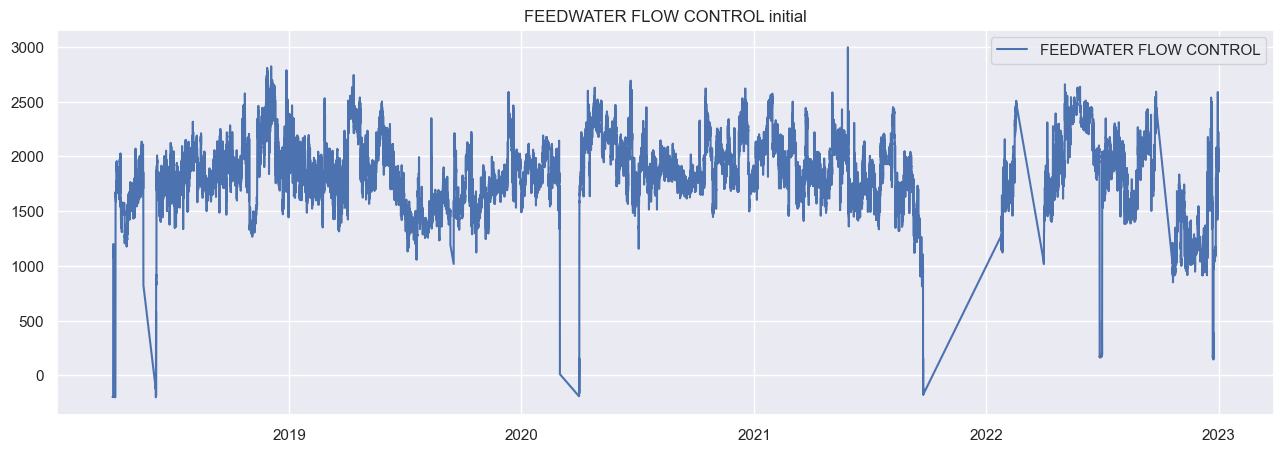

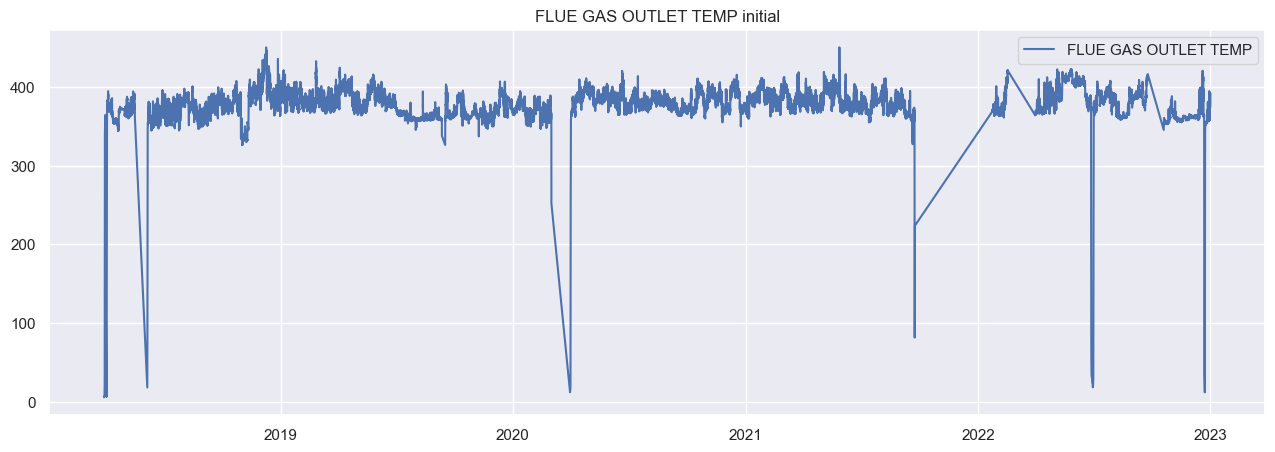

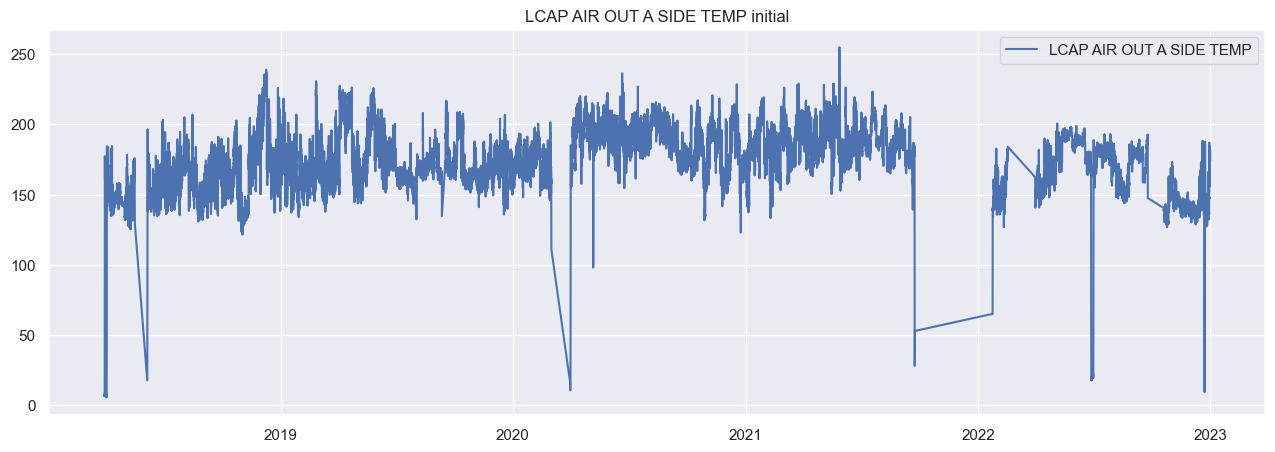

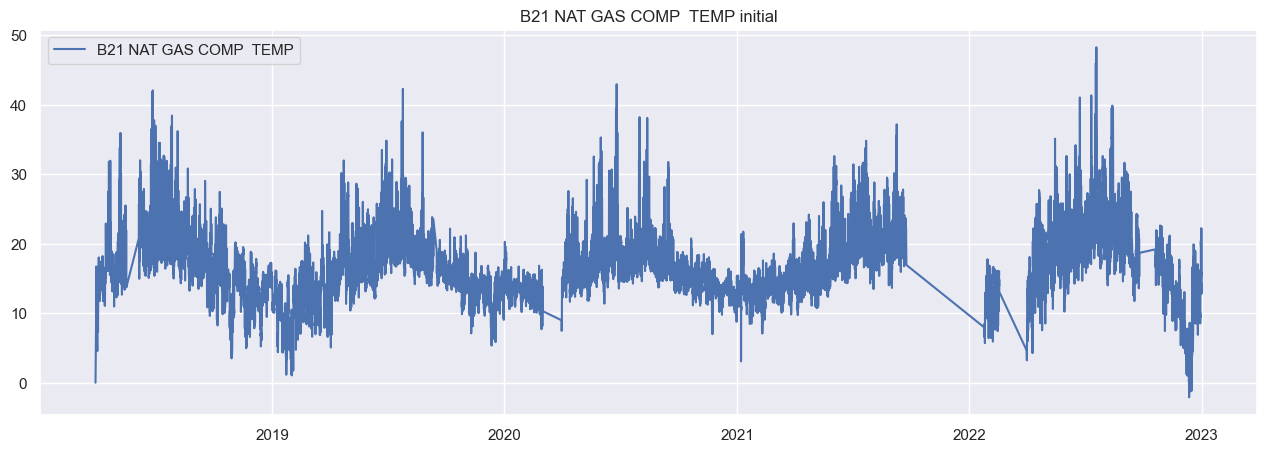

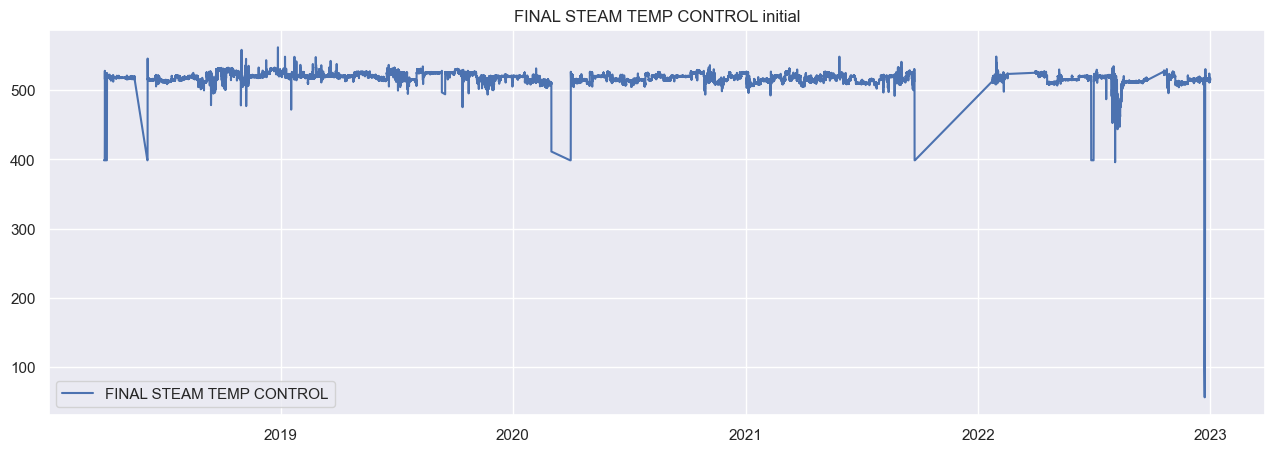

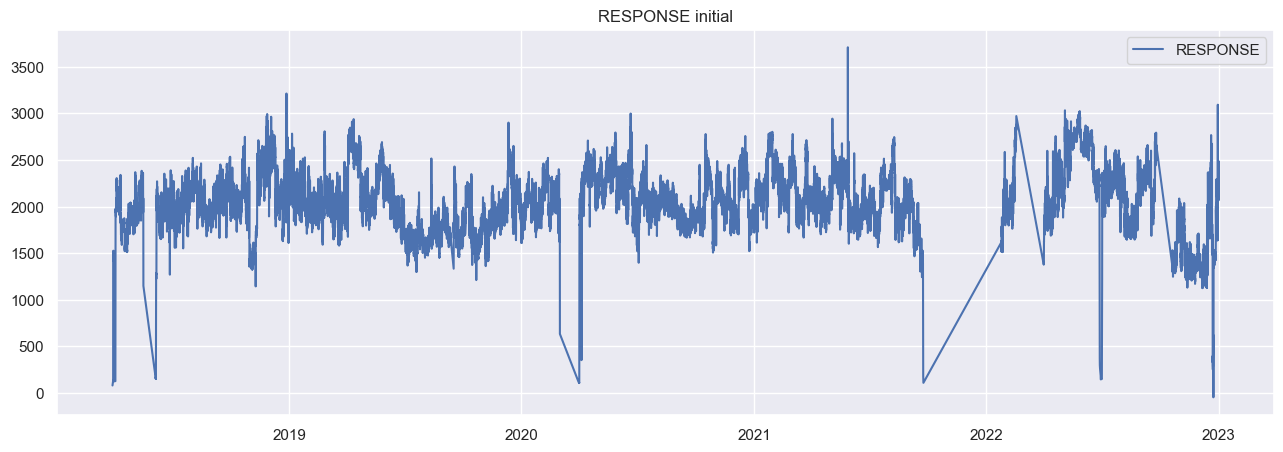

In [28]:
plot_tags(all_df)

# Final Adjustments

In [29]:
all_df = all_df.loc[all_df['FINAL STEAM TEMP CONTROL'] > 300, :]

In [30]:
ctrl_df.columns

Index(['COMBUSTION AIR CONTROL', 'FUEL OIL CONTROL', 'B21 Gas Load'], dtype='object')

In [31]:
all_df.loc[all_df['COMBUSTION AIR CONTROL'] < 0, 'COMBUSTION AIR CONTROL'] = 0
all_df.loc[all_df['FUEL OIL CONTROL'] < 0, 'FUEL OIL CONTROL'] = 0
all_df.loc[all_df['B21 Gas Load'] < 0, 'B21 Gas Load'] = 0

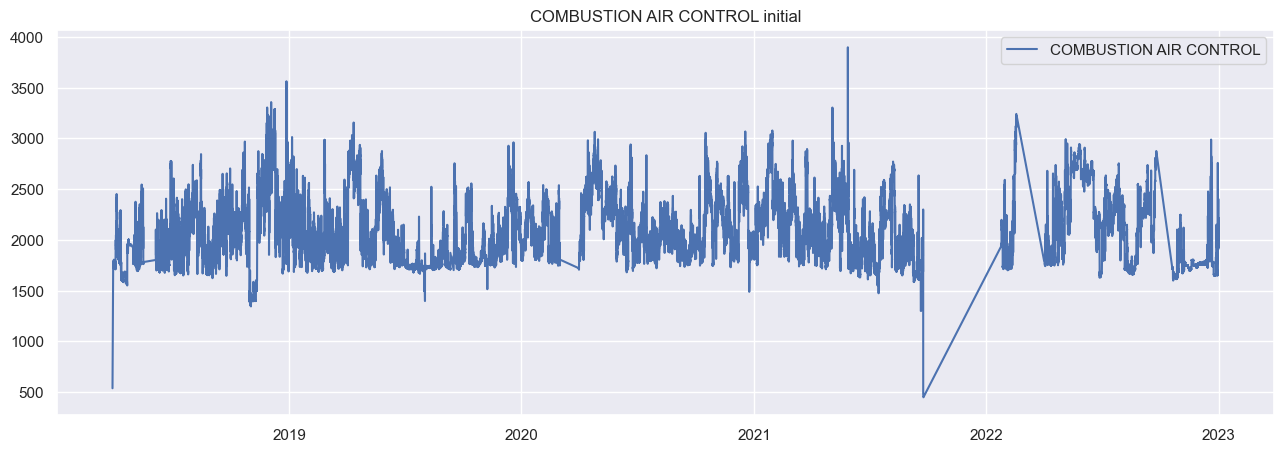

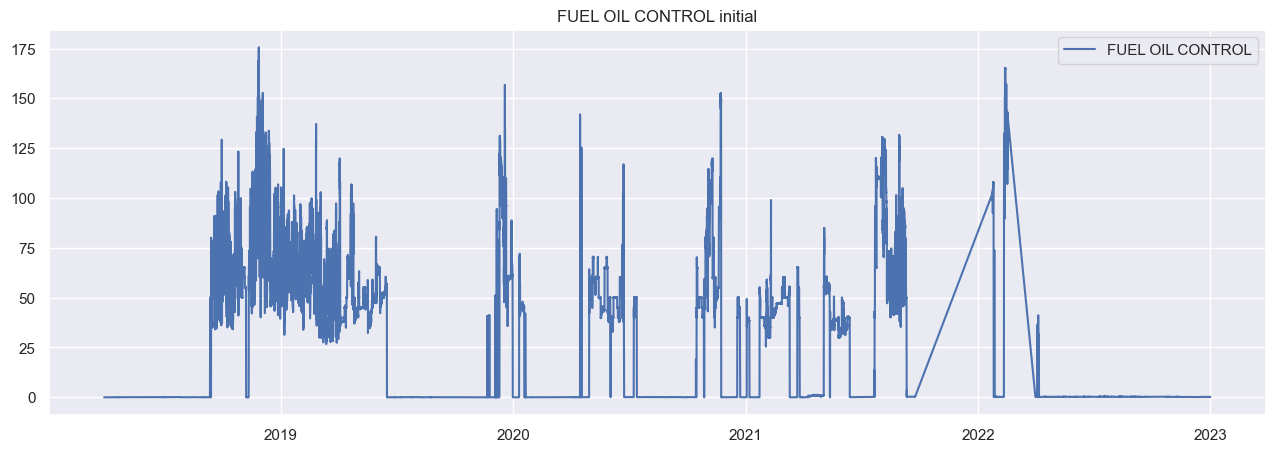

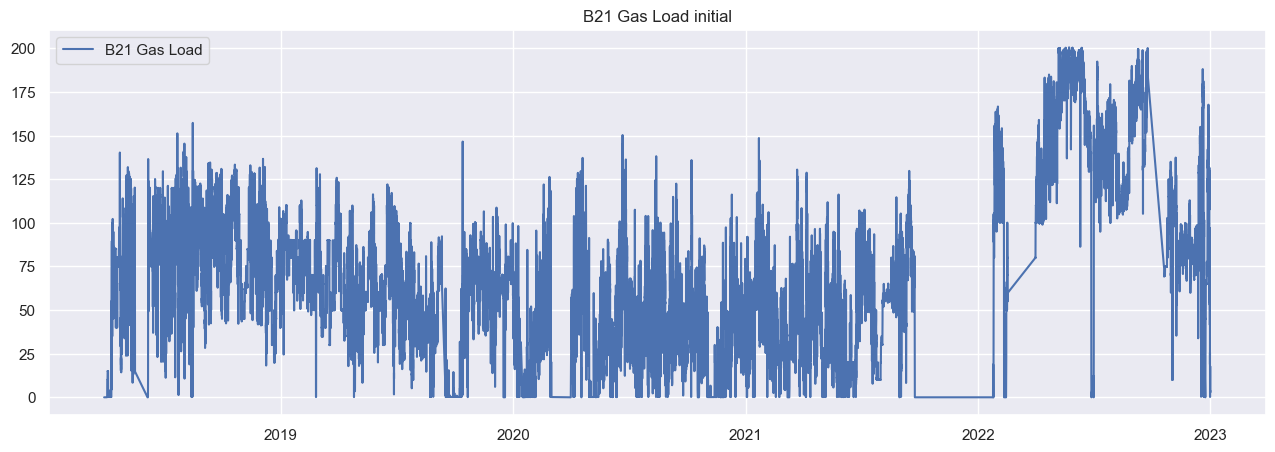

In [32]:
plot_tags(all_df[['COMBUSTION AIR CONTROL', 'FUEL OIL CONTROL', 'B21 Gas Load']])

### Rename & Split data

In [33]:
all_df = all_df.rename({v:k for k,v in names_dict.items()}, axis = 1)

all_df.to_csv(f'../outputs/{process}_processed_df.csv')

opt_df = all_df.loc[all_df.index.year == 2022, :]
opt_df.to_csv(f'../outputs/{process}_test_df.csv')

pre_opt_df = all_df[(all_df.index < pd.to_datetime("2022-01-01 00:00:00"))]
pre_opt_df.to_csv(f'../outputs/{process}_train_df.csv')